# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(55722, 55722)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-05-05 08:30:57,liquid,coincheck,BTC/JPY,0.005,5
1,2020-05-05 08:31:02,coincheck,liquid,BTC/JPY,0.005,1
2,2020-05-05 08:49:41,liquid,coincheck,BTC/JPY,0.005,5
3,2020-05-05 08:49:47,coincheck,liquid,BTC/JPY,0.005,3
4,2020-05-05 08:49:53,coincheck,liquid,BTC/JPY,0.005,5
5,2020-05-05 08:50:05,liquid,coincheck,BTC/JPY,0.005,0
6,2020-05-05 09:40:55,liquid,coincheck,BTC/JPY,0.005,6
7,2020-05-05 09:47:49,coincheck,liquid,BTC/JPY,0.005,-1
8,2020-05-05 10:12:05,liquid,coincheck,BTC/JPY,0.005,5
9,2020-05-05 10:12:09,coincheck,liquid,BTC/JPY,0.005,0


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-05-05 08:30:57,liquid,買い,944760
1,2020-05-05 08:30:57,coincheck,売り,945811
2,2020-05-05 08:31:02,coincheck,買い,945578
3,2020-05-05 08:31:02,liquid,売り,945807
4,2020-05-05 08:49:41,liquid,買い,948160
5,2020-05-05 08:49:41,coincheck,売り,949291
6,2020-05-05 08:49:47,coincheck,買い,948127
7,2020-05-05 08:49:47,liquid,売り,948864
8,2020-05-05 08:49:53,coincheck,買い,948541
9,2020-05-05 08:49:53,liquid,売り,949600


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                55722
           取引回数                   17
           開始日時  2020-05-05 08:13:36
           終了日時  2020-05-05 13:52:06
        取引時間[H]      0 days 05:38:30
      取引単位[BTC]                0.005
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      10053
利益[JPY]         53
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]    31102
終了[TOTAL]  31081.4
利益[TOTAL]  -20.585
-----------  -------


## グラフ出力

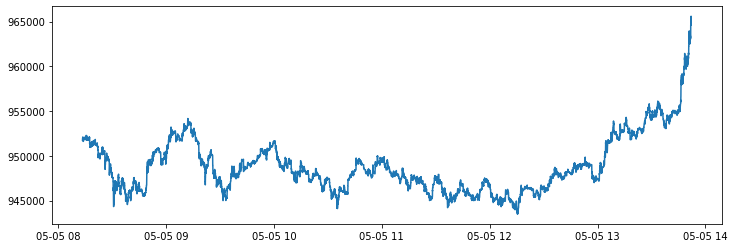

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

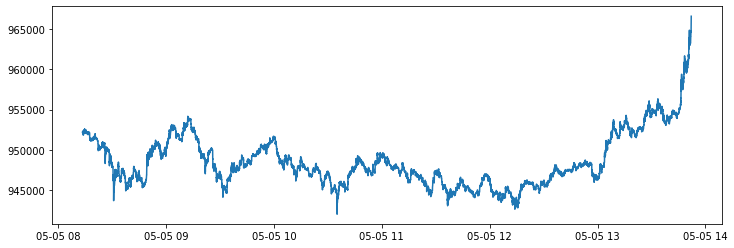

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-05-05 08:10:00,-170,-232,951678,951910,951828,951998
2020-05-05 08:20:00,-203,-267,950127,950394,950255,950458
2020-05-05 08:30:00,-37,-406,946412,946818,946686,946723
2020-05-05 08:40:00,-84,-347,946380,946727,946602,946685
2020-05-05 08:50:00,-325,-135,949898,950032,949865,950190
2020-05-05 09:00:00,-402,36,952005,951968,951848,952249
2020-05-05 09:10:00,-426,-46,952210,952256,952107,952532
2020-05-05 09:20:00,-479,-7,948583,948590,948432,948911
2020-05-05 09:30:00,-663,205,946888,946683,946531,947194
